In [1]:
import gaussian_prime as gp
import numpy as np
import itertools

In [2]:
def Norm(comp):
    return int(comp.real**2 + comp.imag**2)

In [3]:
def ComF(n,m):
    Cof = []
    for i in range(m):
        for j in range(n):
            c=i+j*1j
            Cof.append(c)
    #Cof = np.array(Cof).reshape(n,m)
    return Cof

In [4]:
def division(G):
    #re = int(G.real)
    #im = int(G.imag)
    l=[]
    n = gp.norm(G)
    n = n//2 +1
    for i in ComF(n,n)[1:]:
        if gp.complex_modulus(G,i)==0:
            l.append(i)
    return l

In [5]:
import math
def vector_gaussian(n):
    g = division(n)
    import matplotlib.pyplot as plt
    #fig= plt.figure(figsize=(7,7))
    G = sum(g)
    u = [i.real for i in g]
    v = [i.imag for i in g]
    x = [0 for i in range(len(g))]
    y = [0 for i in range(len(g))]
    if int(math.sqrt(Norm(n)))>=int(math.sqrt(Norm(G))):
        d = int(math.sqrt(Norm(n)))
    else:
        d = int(math.sqrt(Norm(G)))
    plt.gca(xlim=[d*(-1),d],ylim=[d*(-1),d])
    plt.scatter(n.real,n.imag)
    plt.quiver(x,y,u,v,angles='xy',scale_units='xy',scale=1)
    plt.quiver(0,0,G.real,G.imag,angles='xy',scale_units='xy',scale=1,color="r")
    plt.grid(True)
    #plt.show()
    print(g,G)

In [6]:
from ipywidgets import interact, widgets

In [7]:
interact(vector_gaussian, n=(ComF(10,10)[1:]));

interactive(children=(Dropdown(description='n', options=(1j, 2j, 3j, 4j, 5j, 6j, 7j, 8j, 9j, (1+0j), (1+1j), (…

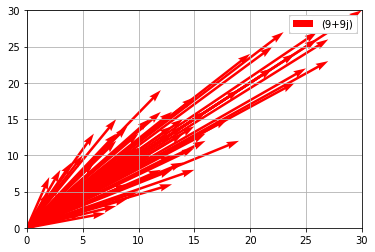

In [8]:
from celluloid import Camera
import matplotlib.pyplot as plt
fig = plt.figure()
camera = Camera(fig)
for n in ComF(10,10):
    g = division(n)
    G = sum(g)
    plt.gca(xlim=[0,30],ylim=[0,30])
    plt.legend(['{}'.format(n)])
    plt.grid(True)
    plt.quiver(0,0,G.real,G.imag,angles='xy',scale_units='xy',scale=1,color="r")
    camera.snap()

In [9]:
animation = camera.animate()

In [10]:
from IPython.display import HTML
HTML(animation.to_html5_video())

In [11]:
def hello(name):
    print(f'hello {name}')

In [12]:
hello('OH')

hello OH


In [13]:
for n in [6,28,496,8128]:
    print(gp.factor_gaussian(n))

([(1+1j), (1+1j), 3], -1j)
([(1+1j), (1+1j), (1+1j), (1+1j), 7], (-1+0j))
([(1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), 31], (1+0j))
([(1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), 127], (-1+0j))


In [14]:
(1+1j)*(1+1j)*(1+1j)*(1+1j)

(-4+0j)

In [15]:
for n in [10,65,20737]:
    print(gp.factor_gaussian(n))

([(1+1j), (1+1j), (2+1j), (2-1j)], -1j)
([(2+1j), (2-1j), (3+2j), (3-2j)], (1+0j))
([(5+8j), (5-8j), (8+13j), (8-13j)], (1-0j))


In [16]:
def Fibonacci(n):
    init = [0,1]
    for i in range(n):
        f = init[-1]+init[-2]
        init += [f]
    return init

In [17]:
Fibonacci(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [18]:
def is_prime(num):
    if num > 1:
        for i in range(2,num//2):
            if (num % i) == 0:
                return False
                break
        else:
            return True
        
def Norm(comp):
    return int(comp.real**2 + comp.imag**2)

def is_gaussian_prime(comp):
    return is_prime(Norm(comp))

In [19]:
for n in Fibonacci(45)[2:]:
    if is_prime(n):
        print(n)
        print(gp.factor_gaussian(n))
        print('****************************************')

2
([(1+1j), (1+1j)], -1j)
****************************************
3
([3], (1+0j))
****************************************
5
([(2+1j), (2-1j)], (1+0j))
****************************************
13
([(3+2j), (3-2j)], (1+0j))
****************************************
89
([(5+8j), (5-8j)], (1-0j))
****************************************
233
([(8+13j), (8-13j)], (1-0j))
****************************************
1597
([(34+21j), (34-21j)], (1+0j))
****************************************
28657
([(144+89j), (144-89j)], (1+0j))
****************************************
514229
([(610+377j), (610-377j)], (1+0j))
****************************************
433494437
([(17711+10946j), (17711-10946j)], (1+0j))
****************************************


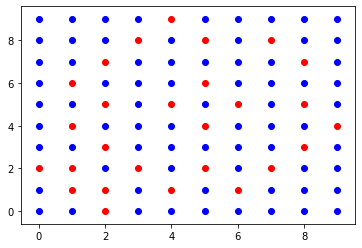

In [20]:
C = [p for p in ComF(10,10) if is_gaussian_prime(p)]
D = [p for p in ComF(10,10) if not is_gaussian_prime(p)]
X = [x.real for x in C]
Y = [x.imag for x in C]

W = [x.real for x in D]
Z = [x.imag for x in D]
plt.scatter(X,Y, color='red')
plt.scatter(W,Z, color='blue')
plt.show()

In [21]:
a=0
for i in [(2+1j), (2-1j), (3+2j), (3-2j), (1+0j)]:
    a += i**2

In [22]:
a

(17+0j)

In [23]:
def comp_fibo(n):
    init = [1,1j]
    for i in range(n):
        u = init[-1]+init[-2]
        init.append(u)
    return init

In [24]:
cf=comp_fibo(20)

In [25]:
cf

[1,
 1j,
 (1+1j),
 (1+2j),
 (2+3j),
 (3+5j),
 (5+8j),
 (8+13j),
 (13+21j),
 (21+34j),
 (34+55j),
 (55+89j),
 (89+144j),
 (144+233j),
 (233+377j),
 (377+610j),
 (610+987j),
 (987+1597j),
 (1597+2584j),
 (2584+4181j),
 (4181+6765j),
 (6765+10946j)]

In [26]:
for n in Fibonacci(20)[2:]:
    
    print(n)
    print(gp.factor_gaussian(n))
    print('****************************************')

1
([], 1)
****************************************
2
([(1+1j), (1+1j)], -1j)
****************************************
3
([3], (1+0j))
****************************************
5
([(2+1j), (2-1j)], (1+0j))
****************************************
8
([(1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j)], 1j)
****************************************
13
([(3+2j), (3-2j)], (1+0j))
****************************************
21
([3, 7], (1+0j))
****************************************
34
([(1+1j), (1+1j), (1+4j), (1-4j)], (-0-1j))
****************************************
55
([(2+1j), (2-1j), 11], (1+0j))
****************************************
89
([(5+8j), (5-8j)], (1-0j))
****************************************
144
([(1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), (1+1j), 3, 3], (1+0j))
****************************************
233
([(8+13j), (8-13j)], (1-0j))
****************************************
377
([(3+2j), (3-2j), (2+5j), (2-5j)], (1-0j))
****************************************
610

In [27]:
import sympy as sp

In [28]:
def tri_comp(n):
    i,j,k = sp.symbols('i j k')
    init = [i,j,k]
    for i in range(n):
        u = init[-1]+init[-2]+init[-3]
        init.append(u)
    return init

In [29]:
tri_comp(10)

[i,
 j,
 k,
 i + j + k,
 i + 2*j + 2*k,
 2*i + 3*j + 4*k,
 4*i + 6*j + 7*k,
 7*i + 11*j + 13*k,
 13*i + 20*j + 24*k,
 24*i + 37*j + 44*k,
 44*i + 68*j + 81*k,
 81*i + 125*j + 149*k,
 149*i + 230*j + 274*k]

In [30]:
for n in cf:
    print(Norm(n))

1
1
2
5
13
34
89
233
610
1597
4181
10946
28657
75025
196418
514229
1346269
3524578
9227465
24157817
63245986
165580141


In [31]:
for i in range(200):
    if is_prime(i) and i%4==3 and i%6==1:
        print(i)

7
19
31
43
67
79
103
127
139
151
163
199


In [32]:
def tri(n):
    init = [1-1j,1+1j,1+1j]
    for i in range(n):
        u = init[-1]+init[-2]+init[-3]
        init.append(u)
    return init

In [33]:
tri(10)

[(1-1j),
 (1+1j),
 (1+1j),
 (3+1j),
 (5+3j),
 (9+5j),
 (17+9j),
 (31+17j),
 (57+31j),
 (105+57j),
 (193+105j),
 (355+193j),
 (653+355j)]

In [34]:
i,j,k = sp.symbols('i j k')

In [35]:
((i+j+k)**2).expand()

i**2 + 2*i*j + 2*i*k + j**2 + 2*j*k + k**2

In [40]:
a=[1, 1, 1]
for i in range(20):
    v = a[-1]+a[-2]+a[-3]
    a.append(v)

In [41]:
for i in a[3:]:
    g=gp.factor_gaussian(i)
    print(i,g)

3 ([3], (1+0j))
5 ([(2+1j), (2-1j)], (1+0j))
9 ([3, 3], (1+0j))
17 ([(1+4j), (1-4j)], (1-0j))
31 ([31], (1+0j))
57 ([3, 19], (1+0j))
105 ([3, (2+1j), (2-1j), 7], (1+0j))
193 ([(12+7j), (12-7j)], (1+0j))
355 ([(2+1j), (2-1j), 71], (1+0j))
653 ([(13+22j), (13-22j)], (1-0j))
1201 ([(25+24j), (25-24j)], (1+0j))
2209 ([47, 47], (1+0j))
4063 ([(1+4j), (1-4j), 239], (1-0j))
7473 ([3, 47, (7+2j), (7-2j)], (1+0j))
13745 ([(2+1j), (2-1j), (30+43j), (30-43j)], (1-0j))
25281 ([3, 3, (7+2j), (7+2j), (7-2j), (7-2j)], (1+0j))
46499 ([46499], (1+0j))
85525 ([(2+1j), (2+1j), (2-1j), (2-1j), 11, 311], (1+0j))
157305 ([3, (2+1j), (2-1j), 10487], (1+0j))
289329 ([3, 96443], (1+0j))


In [45]:
def tri1(n):
    init = [0,1,1j]
    for i in range(n):
        u = init[-1]+init[-2]+init[-3]
        init.append(u)
    return init

In [46]:
tri1(10)

[0,
 1,
 1j,
 (1+1j),
 (2+2j),
 (3+4j),
 (6+7j),
 (11+13j),
 (20+24j),
 (37+44j),
 (68+81j),
 (125+149j),
 (230+274j)]